# Assignment 05

*Due date: 27.04.2022*

This week's assignment has to be returned **in the form a jupyter notebook**. 
Use jupyter notebooks for what they excel at: combining text, code, and figures. Use the markdown format to structure your assignments, and write text when asked to.

Don't forget the [instructions](../assignments)!

## Introduction: live meteorological data

The institute website provides raw data from several stations around Innsbruck using a live feed at the following addresses:
- https://acinn-data.uibk.ac.at/innsbruck/3 for the three days data
- https://acinn-data.uibk.ac.at/innsbruck/7 for the seven days data

The datasets for other stations are available, per analogy:
- https://acinn-data.uibk.ac.at/obergurgl/3
- two other stations are available but we'll have a look at them next time

The data is shared by ACINN under a [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/).

<a href="https://creativecommons.org/licenses/by-sa/4.0/" target="_blank">
  <img src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png"/>
</a>

The data is provided in the [json](https://www.json.org/) format, often used for web applications. Fortunately, this is very easy to read in python. To make your life easier, I have prepared a reading function below. 

It is not important that you understand how it works exactly, but you should understand how to call the function as explained in the examples below.

In [1]:
def acinn_meteo_data(station="innsbruck", ndays=3):
    """Parse live meteorological data from the ACINN servers.

    Requires an internet connection!

    Parameters
    ----------
    station : str
        one of "innsbruck", "obergurgl"
    ndays : int
        either 3 or 7 days

    Returns
    -------
    (time, air_temp, wind_speed, wind_dir) :
        the meteorological data (python lists)

    Examples
    --------
    >>> time, air_temp, wind_speed, wind_dir = acinn_meteo_data()
    >>> type(time)
    <class 'list'>
    >>> len(time) > 0
    True
    >>> type(time[0])
    <class 'datetime.datetime'>
    >>> type(air_temp[0])
    <class 'float'>
    """
    from urllib.request import Request, urlopen
    from datetime import datetime, timedelta
    import json

    url = f'https://acinn-data.uibk.ac.at/{station}/{ndays}'
    req = urlopen(Request(url)).read()
    # Read the data
    data = json.loads(req.decode('utf-8'))

    # Convert the time
    time = [datetime(1970, 1, 1) + timedelta(milliseconds=ds) for ds in data['datumsec']]

    # Read the data
    wind_speed = data['ff']
    wind_dir = data['dd']
    air_temp = data['tl']

    # Return the data
    return time, air_temp, wind_speed, wind_dir


# Testing 
import doctest
doctest.testmod()

TestResults(failed=0, attempted=5)

The function can be called as follows:

In [2]:
time, air_temp, wind_speed, wind_dir = acinn_meteo_data(station='innsbruck', ndays=3)

## Exercise 1: data exploration

Please answer the questions one by one in the cells below. 

**Start by converting all four python lists to numpy arrays. The variable names should stay the same.**

In [3]:
# your answer here

**What is the dtype of the data stored in the `air_temp`, `wind_speed`, `wind_dir` arrays? And their size? And their shape?**

In [4]:
# your answer here

float64 float64 float64
432 432 432
(432,) (432,) (432,)


**What is the dtype of the data stored in the time array? Try to ask the following questions:**
```python
print(time.dtype)
print(type(time[0]))
```

In [5]:
# your answer here

object
<class 'datetime.datetime'>


**What is the time resolution of the data? To answer this question, you can print the two first elements of the time array.**

In [6]:
# your answer here

[datetime.datetime(2022, 4, 9, 16, 30)
 datetime.datetime(2022, 4, 9, 16, 40)]


## Exercise 2: plotting

**Create a graph of the temperature and wind in Innsbruck over the last 3 days**. Start by noticing that matplotlib understands datetime objects very well, and create a graph which looks approximately like this: [example image](innsbruck_wind_example.png) (note that your plot can be different with respect to dates, colors, etc. But be careful with the axis labels and legends).

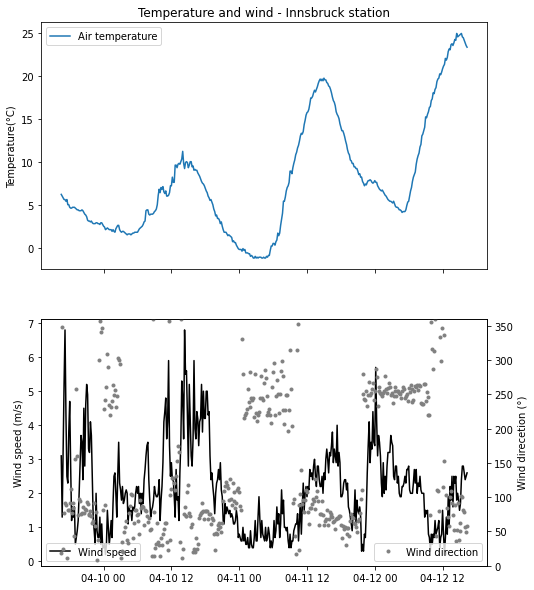

In [7]:
# your answer here

*Note: date formatting on axes is something which is very difficult to do automatically. If you feel like it you can try things like shown on the example below (optional).*


```python
# Define the date format
from matplotlib.dates import DateFormatter, HourLocator
ax.xaxis.set_major_locator(HourLocator(byhour=[0, 12]))
ax.xaxis.set_minor_locator(HourLocator())
ax.xaxis.set_major_formatter(DateFormatter("%b %d, %HH"))
fig.autofmt_xdate()
```

**Now create a graph of the temperature at Innsbruck and Obergurgl over the last 7 days**. The graph should look approximately like this: [example image](temp_example.png) (note that your plot can be different with respect to dates, colors, etc. But be careful with the axis labels and legends).

In [1]:
# your answer here

## Exercise 3: statistics

**Compute the average, maximum and minimum temperature in Innsbruck over the past 7 days.**

In [10]:
# your answer here

Average: 9.54°C
Max: 24.90°C
min: -1.20°C


**Compute the average, maximum and minimum temperature in Innsbruck over the past 24H. For this, assume that the data has no missing timestamp and that the time resolution is constant.**

In [11]:
# your answer here

Average: 12.63°C
Max: 24.90°C
min: 4.10°C


**Compute the number of times that the 10m wind speed in Innsbruck was above 5 m/s over the past 7 days. Now convert this number to a percentage over the past 7 days.**

In [12]:
# your answer here

Number of times above: 67
In percent: 6.6%


**Compute the number of times that the air temperature in Innsbruck was between 0°C and 10°C over the past 7 days. Now convert this number to a percentage over the past 7 days.**

In [13]:
# your answer here

Number of times between 0°C and 10°C: 587
In percent: 58.2%


## Bonus: average wind direction

Look at the plot you made about wind direction. Can you think of what problem would occur if you try to compute the average of the wind direction?

Next week, we will address this problem together - so if you are bored you can start to think about how to solve it already ;-)